In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from battleship import play_game
from random_agent import RandomAgent
from qlearning_agent import QLearningAgent
from hit_close_agent import HitCloseAgent
import numpy as np
import matplotlib.pyplot as plt

# Set Up the Game

In [3]:
GAME_CONFIG = {
    "width" : 5,
    "height" : 5,
    "boats": {
    #"carrier" : {"size" : 5, "number" : 1},
    #"battleship" : {"size" : 4, "number" : 1},
    "cruiser" : {"size" : 3, "number" : 1},
    "submarine" : {"size" : 3, "number" : 1},
    "destroyer" : {"size" : 2, "number" : 1}
    }
}

## Q learning agent

In [5]:
q_agent = QLearningAgent()
NB_GAME_UPDATE = 10000
NB_GAME = 10000
moves_list = []

for i in range(NB_GAME_UPDATE):
    nb_move = play_game(GAME_CONFIG,q_agent,is_update=True)
q_agent.epsilon = 1
for i in range(NB_GAME_UPDATE):
    nb_move = play_game(GAME_CONFIG,q_agent,is_update=False)
    moves_list.append(nb_move)


(array([   6.,   14.,   67.,   72.,  119.,  500.,  468., 1797., 1635.,
        5322.]),
 array([11. , 12.4, 13.8, 15.2, 16.6, 18. , 19.4, 20.8, 22.2, 23.6, 25. ]),
 <BarContainer object of 10 artists>)

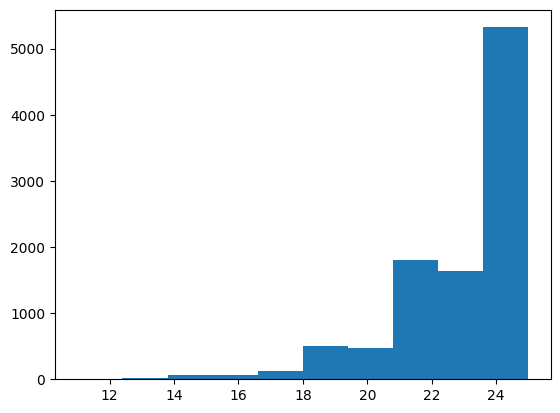

In [7]:
plt.hist(moves_list)

## GYM ENV 

In [4]:
from battleship_env import BattleshipEnv
from dqn_agent import DQNAgent

2023-04-30 15:39:40.153699: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [38]:
env = BattleshipEnv()
env.reset()
env.render_board_generated()

,A,B,C,D,E
1,⬜,⬜,⬜,⬜,⬜
2,⬜,⬜,⬜,⬛,⬛
3,⬜,⬜,⬛,⬛,⬛
4,⬜,⬛,⬛,⬜,⬜
5,⬜,⬜,⬜,⬜,⬜


In [54]:
agent = DQNAgent(env)

EPISODES = 1000
for episode in range(EPISODES):
    state = env.reset()
    done = False
    score = 0

    while not done:
        action = int(agent.act(state))
        next_state, reward, done, info = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        score += reward
    agent.replay()

    print(f"Episode: {episode}, Score: {score}, Epsilon: {agent.epsilon}")

agent.save("battleship-dqn.h5")

Episode: 0, Score: -5.5, Epsilon: 1.0
Episode: 1, Score: -3.5, Epsilon: 1.0
Episode: 2, Score: 100.0, Epsilon: 1.0
Episode: 3, Score: -1.5, Epsilon: 1.0
Episode: 4, Score: -5.0, Epsilon: 1.0
1/1 [==============================] - 0s 26ms/step
Episode: 5, Score: -3.5, Epsilon: 0.9977
Episode: 6, Score: -2.0, Epsilon: 0.9977
Episode: 7, Score: -1.5, Epsilon: 0.9977
Episode: 8, Score: -2.0, Epsilon: 0.9977
Episode: 9, Score: -1.5, Epsilon: 0.9977
1/1 [==============================] - 0s 24ms/step
Episode: 10, Score: -2.0, Epsilon: 0.9954052900000001
Episode: 11, Score: -6, Epsilon: 0.9954052900000001
Episode: 12, Score: 0.0, Epsilon: 0.9954052900000001
Episode: 13, Score: -5.0, Epsilon: 0.9954052900000001
1/1 [==============================] - 0s 32ms/step
Episode: 14, Score: -5.0, Epsilon: 0.9954052900000001
1/1 [==============================] - 0s 28ms/step
Episode: 15, Score: -4.5, Epsilon: 0.9931158578330002
1/1 [==============================] - 0s 27ms/step
Episode: 16, Score: -7.

KeyboardInterrupt: 

In [52]:
agent = DQNAgent(env)
agent.epsilon=0
agent.load("battleship-dqn.h5")

# play one game
state = env.reset()
done = False
hit = 0
while not done:
    action = int(agent.act(state))
    next_state, reward, done, info = env.step(action)
    print(action)
    state = next_state
    hit += 1

print(f"Number of hits to win the game: {hit}" if done else f"Don't win the game in 25 hits")

/Users/francoiswallyn/Desktop/ENSAI/3A/RL/BattleShip-RL/battleship/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 236ms/step
3
1/1 [==============================] - 0s 31ms/step
2
1/1 [==============================] - 0s 42ms/step
3
1/1 [==============================] - 0s 34ms/step
3
1/1 [==============================] - 0s 42ms/step
3
1/1 [==============================] - 0s 55ms/step
3
1/1 [==============================] - 0s 43ms/step
3
1/1 [==============================] - 0s 88ms/step
3
1/1 [==============================] - 0s 103ms/step
3
1/1 [==============================] - 0s 29ms/step
3
1/1 [==============================] - 0s 29ms/step
3
1/1 [==============================] - 0s 38ms/step
3
1/1 [==============================] - 0s 41ms/step
3
1/1 [==============================] - 0s 45ms/step
3
1/1 [==============================] - 0s 52ms/step
3
1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 30ms/step
3
1/1 [=====================